In [1]:
import numpy as np
import pandas as pd

In [2]:
traffic_data=pd.read_csv("C:/Users/ritun/Desktop/MSc Data Science University of Bristol/Data Science Mini Project/CLEANED DATA/Traffic Data/traffic_count_data_scoot.csv")

In [3]:
pollutant_data=pd.read_csv("C:/Users/ritun/Desktop/MSc Data Science University of Bristol/Data Science Mini Project/CLEANED DATA/Pollutants/bristol_air_quality_continous.csv")

C:\Users\ritun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
weather_data=pd.read_csv("C:/Users/ritun/Desktop/MSc Data Science University of Bristol/Data Science Mini Project/CLEANED DATA/Weather Data/meteorological_data_bristol_lulsgate_airport.csv")

In [5]:
traffic_data.drop(columns='Unnamed: 0',inplace=True)

In [6]:
traffic_data_filtered=traffic_data[traffic_data['count_device_id'].isin(['107', '105', '216', '108','101','100','98','82','84','85','86','94','96','97','221','219', '222', '216','130','131','133','137'])]

### Cleaning Pollutant Data:

In [7]:
pollutant_data_filtered=pollutant_data[pollutant_data['site_id']==500]

In [8]:
pollutant_data_filtered.columns

Index(['datetime', 'nox', 'no2', 'no', 'site_id', 'pm10', 'nvpm10', 'vpm10',
       'nvpm25', 'pm25', 'vpm25', 'co', 'o3', 'so2', 'tempt',
       'relative_humidity', 'location', 'site_start_date', 'site_end_date',
       'is_active', 'instrument_type', 'latitude', 'longitude', 'year'],
      dtype='object')

In [9]:
pollutant_data_filtered_relevant_cols=pollutant_data_filtered[['datetime','no2','year']]

In [10]:
pollutant_data_filtered_relevant_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41663 entries, 516433 to 804229
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  41663 non-null  object 
 1   no2       41276 non-null  float64
 2   year      41663 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [11]:
pollutant_data_filtered_relevant_cols=pollutant_data_filtered_relevant_cols[pollutant_data_filtered_relevant_cols['year'].isin(['2020','2021'])]

In [12]:
pollutant_data_filtered_relevant_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 677011 to 804229
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  17544 non-null  object 
 1   no2       17385 non-null  float64
 2   year      17544 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 548.2+ KB


In [13]:
pollutant_data_filtered_relevant_cols.dropna(subset=['no2'],inplace=True)

In [14]:
pollutant_data_filtered_relevant_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17385 entries, 677011 to 804229
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  17385 non-null  object 
 1   no2       17385 non-null  float64
 2   year      17385 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 543.3+ KB


### Final Pollutant Data: 

In [15]:
pollutant_data_final=pollutant_data_filtered_relevant_cols

In [16]:
pollutant_data_final['datetime']=pd.to_datetime(pollutant_data_final['datetime'])

In [17]:
pollutant_data_final

,datetime,no2,year
677011,2020-01-01 00:00:00+00:00,33.9191,2020
677017,2020-01-01 01:00:00+00:00,30.3446,2020
677023,2020-01-01 02:00:00+00:00,27.3564,2020
677031,2020-01-01 03:00:00+00:00,28.1704,2020
677037,2020-01-01 04:00:00+00:00,45.4884,2020
...,...,...,...
804199,2021-12-31 19:00:00+00:00,40.5450,2021
804207,2021-12-31 20:00:00+00:00,37.4850,2021
804215,2021-12-31 21:00:00+00:00,22.1850,2021
804220,2021-12-31 22:00:00+00:00,31.3650,2021


In [18]:
pollutant_data_final['month']=pollutant_data_final['datetime'].dt.month
pollutant_data_final['day']=pollutant_data_final['datetime'].dt.day
pollutant_data_final['hour']=pollutant_data_final['datetime'].dt.hour

In [19]:
pollutant_data_final=pollutant_data_final[['year','month','day','hour','no2']]

In [20]:
pollutant_data_final.sort_values(['year','month','day','hour'], ascending=True,inplace=True)

<ipython-input-20-3a9f17c922ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollutant_data_final.sort_values(['year','month','day','hour'], ascending=True,inplace=True)


In [21]:
pollutant_data_final.reset_index(inplace=True)
pollutant_data_final.drop(columns='index',inplace=True)

C:\Users\ritun\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
pollutant_data_final

,year,month,day,hour,no2
0,2020,1,1,0,33.9191
1,2020,1,1,1,30.3446
2,2020,1,1,2,27.3564
3,2020,1,1,3,28.1704
4,2020,1,1,4,45.4884
...,...,...,...,...,...
17380,2021,12,31,19,40.5450
17381,2021,12,31,20,37.4850
17382,2021,12,31,21,22.1850
17383,2021,12,31,22,31.3650


### Cleaning Weather Data:

In [23]:
weather_data['datetime']=pd.to_datetime(weather_data['datetime'])

In [24]:
weather_data.iloc[0]['datetime']

Timestamp('2022-02-14 23:50:00+0000', tz='UTC')

In [25]:
weather_data.iloc[0]['datetime'].minute

50

In [26]:
weather_data['year']=weather_data['datetime'].dt.year

In [27]:
weather_data_filtered=weather_data[weather_data['year'].isin(['2020','2021'])]

In [28]:
weather_data_filtered_relevant_cols=weather_data_filtered[['datetime','year','tempt','dewpoint_tempt','wind_speed','wind_dir','atm_pressure','visibility','wind_chill_tempt','relative_humidity']]

In [29]:
weather_data_filtered_relevant_cols['month']=weather_data['datetime'].dt.month
weather_data_filtered_relevant_cols['day']=weather_data['datetime'].dt.day
weather_data_filtered_relevant_cols['hour']=weather_data['datetime'].dt.hour
weather_data_filtered_relevant_cols['minute']=weather_data['datetime'].dt.minute

<ipython-input-29-b44a6762edea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered_relevant_cols['month']=weather_data['datetime'].dt.month
<ipython-input-29-b44a6762edea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_filtered_relevant_cols['day']=weather_data['datetime'].dt.day
<ipython-input-29-b44a6762edea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [30]:
weather_data_filtered_relevant_cols=weather_data_filtered_relevant_cols[['datetime','year','month','day','hour','minute','tempt','dewpoint_tempt','wind_speed','wind_dir','atm_pressure','visibility','wind_chill_tempt','relative_humidity']]

In [31]:
weather_data_filtered_relevant_cols.sort_values(['year','month','day','hour','minute'], ascending=True,inplace=True)

In [32]:
weather_data_filtered_relevant_cols.iloc[0]['datetime']

Timestamp('2020-01-01 00:20:00+0000', tz='UTC')

In [33]:
weather_data_filtered_relevant_cols_time_adjusted=weather_data_filtered_relevant_cols.groupby(['year','month','day','hour'])['tempt','dewpoint_tempt','wind_speed','wind_dir','atm_pressure','visibility','wind_chill_tempt','relative_humidity'].mean().reset_index()

<ipython-input-33-cf9b9b4c3cf6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weather_data_filtered_relevant_cols_time_adjusted=weather_data_filtered_relevant_cols.groupby(['year','month','day','hour'])['tempt','dewpoint_tempt','wind_speed','wind_dir','atm_pressure','visibility','wind_chill_tempt','relative_humidity'].mean().reset_index()


### Final Weather Data:

In [34]:
weather_data_final=weather_data_filtered_relevant_cols_time_adjusted

In [35]:
weather_data_final.reset_index(inplace=True)
weather_data_final.drop(columns='index',inplace=True)

In [36]:
weather_data_final

,year,month,day,hour,tempt,dewpoint_tempt,wind_speed,wind_dir,atm_pressure,visibility,wind_chill_tempt,relative_humidity
0,2020,1,1,0,5.5,3.5,4.6300,130.0,1028.107,9.9940,2.122,86.940
1,2020,1,1,1,5.0,3.5,3.3435,120.0,1028.107,9.9940,2.300,90.065
2,2020,1,1,2,5.0,4.0,2.8290,110.0,1028.107,4.1040,2.625,93.240
3,2020,1,1,3,5.0,4.0,2.8290,90.0,1028.107,1.2715,2.625,93.240
4,2020,1,1,4,5.0,4.0,2.8290,85.0,1028.107,0.4745,2.625,93.240
...,...,...,...,...,...,...,...,...,...,...,...,...
17463,2021,12,31,19,12.0,11.0,5.5000,180.0,1019.000,10.0000,12.000,94.000
17464,2021,12,31,20,12.0,11.0,5.0000,180.0,1019.000,8.5000,12.000,94.000
17465,2021,12,31,21,12.0,12.0,6.5000,175.0,1018.000,0.5000,12.000,100.000
17466,2021,12,31,22,12.0,12.0,4.5000,175.0,1018.000,8.0000,12.000,100.000


### Cleaning Traffic Data :

In [37]:
traffic_data_filtered

,count_device_id,date_time,hourly_flow,hourly_profile,description,full_name,geo_point_2d,link,link_direction_lane,junction,latitude,longitude
0,100,2021-05-06 22:00:00+01:00,240,168,Bond St EB L2 @ Gloucester St,D02182 - Bond St EB L2 @ Gloucester St,"51.459311,-2.58684",Bond St,Bond St EB L2,Gloucester St,51.459311,-2.586840
7,219,2020-10-12 11:00:00+01:00,456,368,Temple Way NB L1 @ Avon St,D04214 - Temple Way NB L1 @ Avon St,"51.45327,-2.5841258",Temple Way,Temple Way NB L1,Avon St,51.453270,-2.584126
17,222,2020-02-05 04:00:00+00:00,0,0,Avon St WB @ Temple Way,D04216 - Avon St WB @ Temple Way,"51.453209,-2.5832689",Avon St,Avon St WB,Temple Way,51.453209,-2.583269
23,130,2021-05-05 10:00:00+01:00,504,280,Broad Weir WB @ Penn St/Castle,D03122 - Broad Weir WB @ Penn St/Castle,"51.456827,-2.5860135",Broad Weir,Broad Weir WB,Penn St/Castle,51.456827,-2.586013
52,130,2020-08-03 08:00:00+01:00,272,176,Broad Weir WB @ Penn St/Castle,D03122 - Broad Weir WB @ Penn St/Castle,"51.456827,-2.5860135",Broad Weir,Broad Weir WB,Penn St/Castle,51.456827,-2.586013
...,...,...,...,...,...,...,...,...,...,...,...,...
8488217,97,2022-02-11 17:00:00+00:00,240,200,Houlton St NB @ Newfoundland/M32,D02176 - Houlton St NB @ Newfoundland/M32,"51.46021,-2.582291",Houlton St,Houlton St NB,Newfoundland/M32,51.460210,-2.582291
8488260,100,2022-02-11 22:00:00+00:00,384,352,Bond St EB L2 @ Gloucester St,D02182 - Bond St EB L2 @ Gloucester St,"51.459311,-2.58684",Bond St,Bond St EB L2,Gloucester St,51.459311,-2.586840
8488276,101,2022-02-11 10:00:00+00:00,360,328,Bond St EB L3 @ Gloucester St,D02183 - Bond St EB L3 @ Gloucester St,"51.459307,-2.58684",Bond St,Bond St EB L3,Gloucester St,51.459307,-2.586840
8488283,131,2022-02-11 07:00:00+00:00,64,104,Lwr Castle St SB L2 @ Broadweir,D03123 - Lwr Castle St SB L2 @ Broadweir,"51.45676,-2.5857382",Lwr Castle,Lwr Castle St SB L2,Broadweir,51.456760,-2.585738


In [38]:
traffic_data_filtered_time_adjusted=traffic_data_filtered.copy()

In [39]:
traffic_data_filtered

,count_device_id,date_time,hourly_flow,hourly_profile,description,full_name,geo_point_2d,link,link_direction_lane,junction,latitude,longitude
0,100,2021-05-06 22:00:00+01:00,240,168,Bond St EB L2 @ Gloucester St,D02182 - Bond St EB L2 @ Gloucester St,"51.459311,-2.58684",Bond St,Bond St EB L2,Gloucester St,51.459311,-2.586840
7,219,2020-10-12 11:00:00+01:00,456,368,Temple Way NB L1 @ Avon St,D04214 - Temple Way NB L1 @ Avon St,"51.45327,-2.5841258",Temple Way,Temple Way NB L1,Avon St,51.453270,-2.584126
17,222,2020-02-05 04:00:00+00:00,0,0,Avon St WB @ Temple Way,D04216 - Avon St WB @ Temple Way,"51.453209,-2.5832689",Avon St,Avon St WB,Temple Way,51.453209,-2.583269
23,130,2021-05-05 10:00:00+01:00,504,280,Broad Weir WB @ Penn St/Castle,D03122 - Broad Weir WB @ Penn St/Castle,"51.456827,-2.5860135",Broad Weir,Broad Weir WB,Penn St/Castle,51.456827,-2.586013
52,130,2020-08-03 08:00:00+01:00,272,176,Broad Weir WB @ Penn St/Castle,D03122 - Broad Weir WB @ Penn St/Castle,"51.456827,-2.5860135",Broad Weir,Broad Weir WB,Penn St/Castle,51.456827,-2.586013
...,...,...,...,...,...,...,...,...,...,...,...,...
8488217,97,2022-02-11 17:00:00+00:00,240,200,Houlton St NB @ Newfoundland/M32,D02176 - Houlton St NB @ Newfoundland/M32,"51.46021,-2.582291",Houlton St,Houlton St NB,Newfoundland/M32,51.460210,-2.582291
8488260,100,2022-02-11 22:00:00+00:00,384,352,Bond St EB L2 @ Gloucester St,D02182 - Bond St EB L2 @ Gloucester St,"51.459311,-2.58684",Bond St,Bond St EB L2,Gloucester St,51.459311,-2.586840
8488276,101,2022-02-11 10:00:00+00:00,360,328,Bond St EB L3 @ Gloucester St,D02183 - Bond St EB L3 @ Gloucester St,"51.459307,-2.58684",Bond St,Bond St EB L3,Gloucester St,51.459307,-2.586840
8488283,131,2022-02-11 07:00:00+00:00,64,104,Lwr Castle St SB L2 @ Broadweir,D03123 - Lwr Castle St SB L2 @ Broadweir,"51.45676,-2.5857382",Lwr Castle,Lwr Castle St SB L2,Broadweir,51.456760,-2.585738


In [40]:
traffic_data_filtered_time_adjusted['date_time']=pd.to_datetime(traffic_data_filtered['date_time'],utc=True)

In [41]:
traffic_data_filtered_time_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357705 entries, 0 to 8488327
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   count_device_id      357705 non-null  int64              
 1   date_time            357705 non-null  datetime64[ns, UTC]
 2   hourly_flow          357705 non-null  int64              
 3   hourly_profile       357705 non-null  int64              
 4   description          357705 non-null  object             
 5   full_name            357705 non-null  object             
 6   geo_point_2d         357705 non-null  object             
 7   link                 357705 non-null  object             
 8   link_direction_lane  357705 non-null  object             
 9   junction             357705 non-null  object             
 10  latitude             357705 non-null  float64            
 11  longitude            357705 non-null  float64            
dtypes

In [42]:
traffic_data_filtered_time_adjusted_relevant_cols=traffic_data_filtered_time_adjusted[['count_device_id','date_time','hourly_flow','hourly_profile','description']]

In [43]:
traffic_data_filtered_time_adjusted_relevant_cols['month']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.month
traffic_data_filtered_time_adjusted_relevant_cols['day']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.day
traffic_data_filtered_time_adjusted_relevant_cols['hour']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.hour

<ipython-input-43-c37f68411674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_filtered_time_adjusted_relevant_cols['month']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.month
<ipython-input-43-c37f68411674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_filtered_time_adjusted_relevant_cols['day']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.day
<ipython-input-43-c37f68411674>:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [44]:
traffic_data_filtered_time_adjusted_relevant_cols['year']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.year

<ipython-input-44-1ad86949e436>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_data_filtered_time_adjusted_relevant_cols['year']=traffic_data_filtered_time_adjusted_relevant_cols['date_time'].dt.year


In [45]:
traffic_data_filtered_time_adjusted_relevant_cols=traffic_data_filtered_time_adjusted_relevant_cols[traffic_data_filtered_time_adjusted_relevant_cols['year'].isin(['2020','2021'])]

In [46]:
traffic_data_filtered_time_adjusted_relevant_cols_columns_order_adjusted=traffic_data_filtered_time_adjusted_relevant_cols[['count_device_id','date_time','year','month','day','hour','description','hourly_flow','hourly_profile']]

In [47]:
traffic_data_filtered_time_adjusted_relevant_cols_columns_order_adjusted

,count_device_id,date_time,year,month,day,hour,description,hourly_flow,hourly_profile
0,100,2021-05-06 21:00:00+00:00,2021,5,6,21,Bond St EB L2 @ Gloucester St,240,168
7,219,2020-10-12 10:00:00+00:00,2020,10,12,10,Temple Way NB L1 @ Avon St,456,368
17,222,2020-02-05 04:00:00+00:00,2020,2,5,4,Avon St WB @ Temple Way,0,0
23,130,2021-05-05 09:00:00+00:00,2021,5,5,9,Broad Weir WB @ Penn St/Castle,504,280
52,130,2020-08-03 07:00:00+00:00,2020,8,3,7,Broad Weir WB @ Penn St/Castle,272,176
...,...,...,...,...,...,...,...,...,...
8452893,130,2021-08-30 12:00:00+00:00,2021,8,30,12,Broad Weir WB @ Penn St/Castle,480,416
8452908,108,2021-08-30 16:00:00+00:00,2021,8,30,16,Temple Way SB Off Slip @ Old Mkt,248,288
8452912,131,2021-08-30 14:00:00+00:00,2021,8,30,14,Lwr Castle St SB L2 @ Broadweir,448,456
8452993,85,2021-08-30 07:00:00+00:00,2021,8,30,7,Bond St WB L1 @ Pritchard St,40,152


In [48]:
traffic_data_filtered_time_adjusted_relevant_cols_columns_order_adjusted.sort_values(['year','month','day','hour'], ascending=True,inplace=True)

In [49]:
traffic_data_filtered_time_adjusted_relevant_cols_columns_order_adjusted

,count_device_id,date_time,year,month,day,hour,description,hourly_flow,hourly_profile
570460,96,2020-01-01 00:00:00+00:00,2020,1,1,0,Newfoundland Circus OB L2 @ M32,456,296
1370867,97,2020-01-01 00:00:00+00:00,2020,1,1,0,Houlton St NB @ Newfoundland/M32,232,120
1414186,221,2020-01-01 00:00:00+00:00,2020,1,1,0,Temple Way NB L2 @ Avon St,240,144
1436149,133,2020-01-01 00:00:00+00:00,2020,1,1,0,Lwr Castle St SB L1 @ Broadweir,64,0
2154279,98,2020-01-01 00:00:00+00:00,2020,1,1,0,Bond St EB L1 @ Gloucester St,392,240
...,...,...,...,...,...,...,...,...,...
8231099,108,2021-12-31 23:00:00+00:00,2021,12,31,23,Temple Way SB Off Slip @ Old Mkt,176,192
8231535,216,2021-12-31 23:00:00+00:00,2021,12,31,23,Old Mkt St SB Slip @ Temple Way,192,192
8231557,97,2021-12-31 23:00:00+00:00,2021,12,31,23,Houlton St NB @ Newfoundland/M32,232,200
8231616,98,2021-12-31 23:00:00+00:00,2021,12,31,23,Bond St EB L1 @ Gloucester St,336,448


In [50]:
traffic_data_final=traffic_data_filtered_time_adjusted_relevant_cols_columns_order_adjusted.set_index(['date_time']).pivot(columns="count_device_id", values="hourly_flow")

In [51]:
traffic_data_final.reset_index(inplace=True)

In [52]:
traffic_data_final.index.names = ['index']

In [53]:
traffic_data_final

count_device_id,date_time,82,84,85,86,94,96,97,98,100,...,107,108,130,131,133,137,216,219,221,222
index,,,,,,,,,,,,,,,,,,,,,
0,2020-01-01 00:00:00+00:00,416.0,536.0,184.0,64.0,544.0,456.0,232.0,392.0,312.0,...,96.0,0.0,272.0,176.0,64.0,648.0,120.0,112.0,240.0,48.0
1,2020-01-01 01:00:00+00:00,240.0,376.0,104.0,72.0,560.0,472.0,224.0,448.0,336.0,...,96.0,0.0,200.0,176.0,48.0,432.0,96.0,96.0,216.0,24.0
2,2020-01-01 02:00:00+00:00,280.0,408.0,112.0,96.0,688.0,528.0,248.0,504.0,344.0,...,168.0,0.0,208.0,136.0,40.0,536.0,112.0,136.0,280.0,48.0
3,2020-01-01 03:00:00+00:00,256.0,400.0,128.0,64.0,552.0,440.0,240.0,432.0,328.0,...,112.0,0.0,224.0,144.0,32.0,496.0,144.0,104.0,208.0,40.0
4,2020-01-01 04:00:00+00:00,224.0,376.0,128.0,72.0,520.0,432.0,288.0,432.0,344.0,...,112.0,0.0,152.0,112.0,32.0,504.0,120.0,88.0,176.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16346,2021-12-31 19:00:00+00:00,664.0,704.0,224.0,128.0,816.0,744.0,216.0,448.0,392.0,...,480.0,240.0,152.0,392.0,0.0,1240.0,336.0,416.0,656.0,64.0
16347,2021-12-31 20:00:00+00:00,600.0,688.0,224.0,152.0,816.0,720.0,216.0,504.0,408.0,...,408.0,256.0,192.0,312.0,0.0,1160.0,256.0,376.0,584.0,56.0
16348,2021-12-31 21:00:00+00:00,536.0,672.0,224.0,112.0,632.0,576.0,232.0,408.0,360.0,...,336.0,224.0,168.0,264.0,0.0,1032.0,240.0,280.0,568.0,48.0


In [54]:
traffic_data_final['year']=traffic_data_final['date_time'].dt.year
traffic_data_final['month']=traffic_data_final['date_time'].dt.month
traffic_data_final['day']=traffic_data_final['date_time'].dt.day
traffic_data_final['hour']=traffic_data_final['date_time'].dt.hour

In [55]:
traffic_data_final.columns

Index(['date_time',          82,          84,          85,          86,
                94,          96,          97,          98,         100,
               101,         105,         107,         108,         130,
               131,         133,         137,         216,         219,
               221,         222,      'year',     'month',       'day',
            'hour'],
      dtype='object', name='count_device_id')

In [56]:
traffic_data_final=traffic_data_final[['year','month','day','hour',82,84,85,86,94,96,97,98,100,101,105,107,108,130,131,133,137,216,219,221,222]]

### Final Traffic Data:

In [57]:
traffic_data_final

count_device_id,year,month,day,hour,82,84,85,86,94,96,...,107,108,130,131,133,137,216,219,221,222
index,,,,,,,,,,,,,,,,,,,,,
0,2020,1,1,0,416.0,536.0,184.0,64.0,544.0,456.0,...,96.0,0.0,272.0,176.0,64.0,648.0,120.0,112.0,240.0,48.0
1,2020,1,1,1,240.0,376.0,104.0,72.0,560.0,472.0,...,96.0,0.0,200.0,176.0,48.0,432.0,96.0,96.0,216.0,24.0
2,2020,1,1,2,280.0,408.0,112.0,96.0,688.0,528.0,...,168.0,0.0,208.0,136.0,40.0,536.0,112.0,136.0,280.0,48.0
3,2020,1,1,3,256.0,400.0,128.0,64.0,552.0,440.0,...,112.0,0.0,224.0,144.0,32.0,496.0,144.0,104.0,208.0,40.0
4,2020,1,1,4,224.0,376.0,128.0,72.0,520.0,432.0,...,112.0,0.0,152.0,112.0,32.0,504.0,120.0,88.0,176.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16346,2021,12,31,19,664.0,704.0,224.0,128.0,816.0,744.0,...,480.0,240.0,152.0,392.0,0.0,1240.0,336.0,416.0,656.0,64.0
16347,2021,12,31,20,600.0,688.0,224.0,152.0,816.0,720.0,...,408.0,256.0,192.0,312.0,0.0,1160.0,256.0,376.0,584.0,56.0
16348,2021,12,31,21,536.0,672.0,224.0,112.0,632.0,576.0,...,336.0,224.0,168.0,264.0,0.0,1032.0,240.0,280.0,568.0,48.0


### Merging Pollutant, Weather and Traffic Data:

In [58]:
data=pd.merge(pd.merge(pollutant_data_final,weather_data_final,on=['year','month','day','hour']),traffic_data_final,on=['year','month','day','hour'])

In [59]:
data

,year,month,day,hour,no2,tempt,dewpoint_tempt,wind_speed,wind_dir,atm_pressure,...,107,108,130,131,133,137,216,219,221,222
0,2020,1,1,0,33.9191,5.5,3.5,4.6300,130.0,1028.107,...,96.0,0.0,272.0,176.0,64.0,648.0,120.0,112.0,240.0,48.0
1,2020,1,1,1,30.3446,5.0,3.5,3.3435,120.0,1028.107,...,96.0,0.0,200.0,176.0,48.0,432.0,96.0,96.0,216.0,24.0
2,2020,1,1,2,27.3564,5.0,4.0,2.8290,110.0,1028.107,...,168.0,0.0,208.0,136.0,40.0,536.0,112.0,136.0,280.0,48.0
3,2020,1,1,3,28.1704,5.0,4.0,2.8290,90.0,1028.107,...,112.0,0.0,224.0,144.0,32.0,496.0,144.0,104.0,208.0,40.0
4,2020,1,1,4,45.4884,5.0,4.0,2.8290,85.0,1028.107,...,112.0,0.0,152.0,112.0,32.0,504.0,120.0,88.0,176.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16145,2021,12,31,19,40.5450,12.0,11.0,5.5000,180.0,1019.000,...,480.0,240.0,152.0,392.0,0.0,1240.0,336.0,416.0,656.0,64.0
16146,2021,12,31,20,37.4850,12.0,11.0,5.0000,180.0,1019.000,...,408.0,256.0,192.0,312.0,0.0,1160.0,256.0,376.0,584.0,56.0
16147,2021,12,31,21,22.1850,12.0,12.0,6.5000,175.0,1018.000,...,336.0,224.0,168.0,264.0,0.0,1032.0,240.0,280.0,568.0,48.0
16148,2021,12,31,22,31.3650,12.0,12.0,4.5000,175.0,1018.000,...,248.0,200.0,88.0,224.0,0.0,936.0,184.0,248.0,448.0,56.0


### Machine Learning:

In [60]:
import matplotlib.pyplot as plt # for plotting 
import seaborn as sn #for plotting

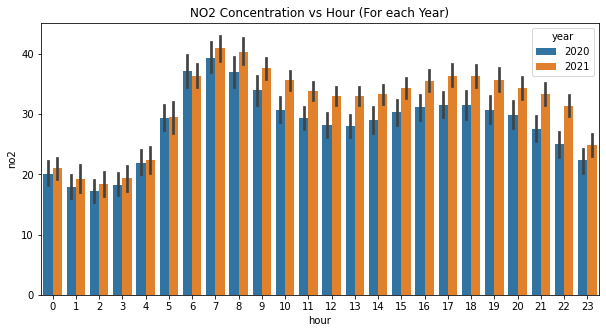

In [61]:
plt.figure(figsize=(10,5))
ax=sn.barplot(x='hour',y='no2',hue='year',data=data).set(title='NO2 Concentration vs Hour (For each Year)')

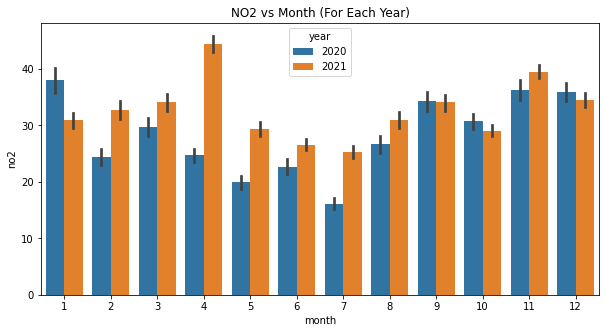

In [62]:
plt.figure(figsize=(10,5))
ax=sn.barplot(x='month',y='no2',hue='year',data=data).set(title='NO2 vs Month (For Each Year)')

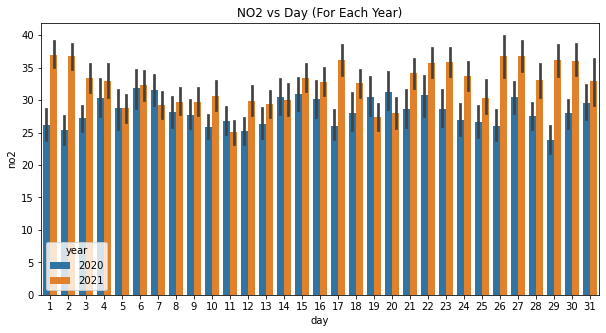

In [63]:
plt.figure(figsize=(10,5))
ax=sn.barplot(x='day',y='no2',hue='year',data=data).set(title='NO2 vs Day (For Each Year)')

In [64]:
# weekday and weekend plot

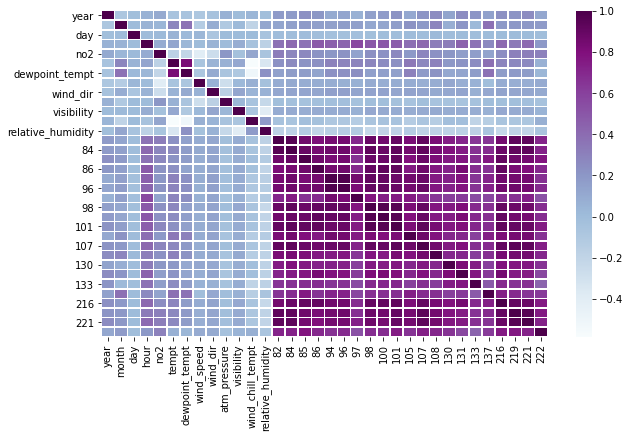

In [65]:
corrmatrix = data.corr()

fig, ax = plt.subplots(figsize=(10,6)) # Sample figsize in inches
sn.heatmap(corrmatrix, linewidths=.5, ax=ax,cmap="BuPu",fmt='.2f')
plt.show()

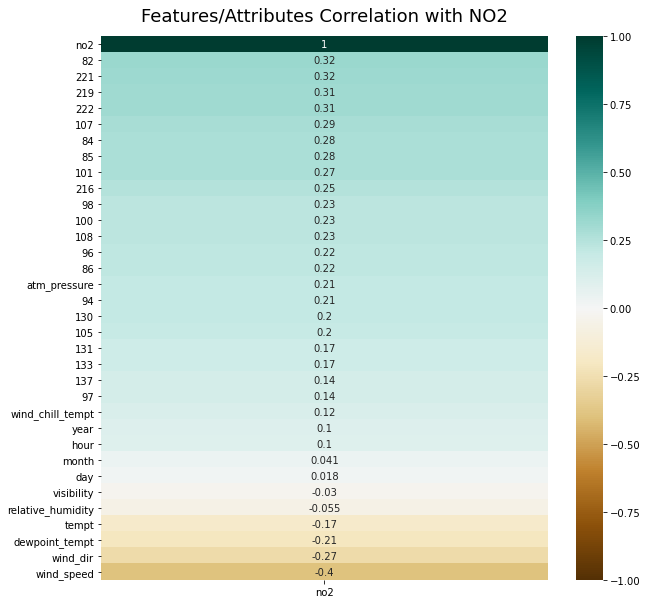

In [66]:
plt.figure(figsize=(10,10))
heatmap = sn.heatmap(corrmatrix[['no2']].sort_values(by='no2', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features/Attributes Correlation with NO2', fontdict={'fontsize':18}, pad=16);

In [67]:
data.dropna(inplace=True)

In [68]:
y=data['no2']
X=data.drop(columns='no2')

In [69]:
# importing train_test_split from sklearn for splitting the data into train and test sets
from sklearn.model_selection import train_test_split
# Using train_test_split to randomly split the data into 80 percent train data and 20 percent test set (which we will test on at the end when we have finalized the model and tuned the hyperparameters)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) # setting seed for reproducability

### Linear Regression Model:

In [70]:
#Creating the Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [71]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [72]:
test_pred=lr_model.predict(X_test)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

In [74]:
print('MAE Linear Regression Model (Test):', mean_absolute_error(y_test,test_pred))

MAE Linear Regression Model (Test): 10.787041797254153


In [75]:
print('RMSE Linear Regression (Test):',mean_squared_error(y_test,test_pred,squared=False))

RMSE Linear Regression (Test): 14.193030234532982


In [76]:
print('R2 Linear Regression:(Test)', r2_score(y_test,test_pred))

R2 Linear Regression:(Test) 0.497398382458517


### Random Forrest Regressor Model:

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf_model =RandomForestRegressor(random_state=5,n_estimators=600) 

In [79]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600, random_state=5)

In [80]:
test_pred_rf=rf_model.predict(X_test)

In [81]:
print('MAE Random Forest Model (Test):', mean_absolute_error(y_test,test_pred_rf))
print('RMSE Random Forest (Test):',mean_squared_error(y_test,test_pred_rf,squared=False))
print('R2 Random Forest:(Test)', r2_score(y_test,test_pred_rf))

MAE Random Forest Model (Test): 6.983879457327143
RMSE Random Forest (Test): 9.964490064450125
R2 Random Forest:(Test) 0.7522670449805262


In [82]:
import shap

In [83]:
shap_values = shap.TreeExplainer(rf_model).shap_values(X_train,approximate=True)

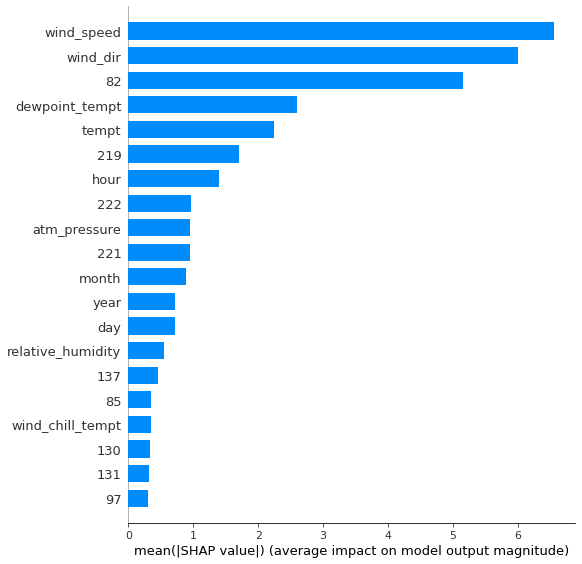

In [84]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

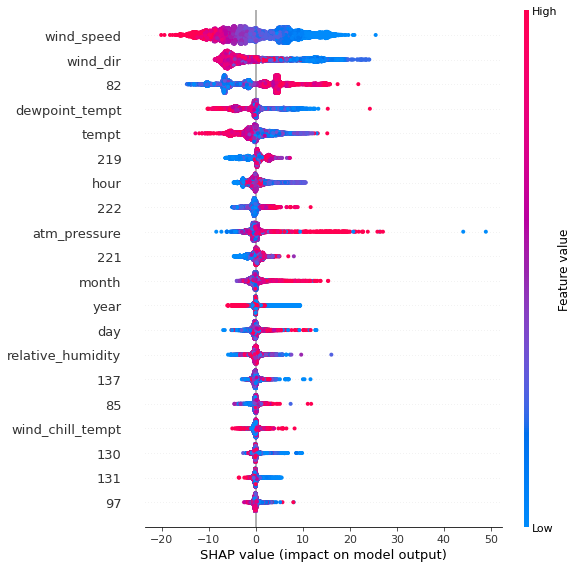

In [85]:
shap.summary_plot(shap_values, X_train)

In [86]:
# from sklearn.model_selection import cross_val_score
# rf_model_cv =RandomForestRegressor(random_state=5)
# print('MAE (Random Forest Regressor):',-1*cross_val_score(rf_model_cv, X_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean())
# print('MSE (Random Forest Regressor):',-1*cross_val_score(rf_model_cv, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean())
# print('RMSE (Random Forest Regressor):',-1*cross_val_score(rf_model_cv, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean())
# print('R2 (Random Forest Regressor)',cross_val_score(rf_model_cv, X_train, y_train, scoring='r2', cv=5).mean())

### XBG Model:

In [87]:
from xgboost import XGBRegressor
#xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train,
 early_stopping_rounds=5,
 eval_set=[(X_test, y_test)],
 verbose=False)
test_pred_xgb=xgb_model.predict(X_test)

In [88]:
print('MAE XGB Model (Test):', mean_absolute_error(y_test,test_pred_xgb))
print('RMSE XGB Forest (Test):',mean_squared_error(y_test,test_pred_xgb,squared=False))
print('R2 XGB Forest:(Test)', r2_score(y_test,test_pred_xgb))

MAE XGB Model (Test): 7.12439424383196
RMSE XGB Forest (Test): 10.026461070897977
R2 XGB Forest:(Test) 0.7491760689793482
